## **Iris Classification Project (ML/FA/DA)**

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [6]:
# Loading Dataset
df=pd.read_csv('C:/Users/admin/Desktop/MyProjects/IrisClassificationSystem/Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [12]:
print("\nFirst 5 Rows:")
print(df.head())
print("\nDataset Shape:", df.shape)


First 5 Rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Shape: (150, 6)


In [13]:
# Train-Test Split & Standardization

# X = df.drop(['Species', 'Id'], axis=1)
X = df.iloc[:, 1:4]
y = df['Species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

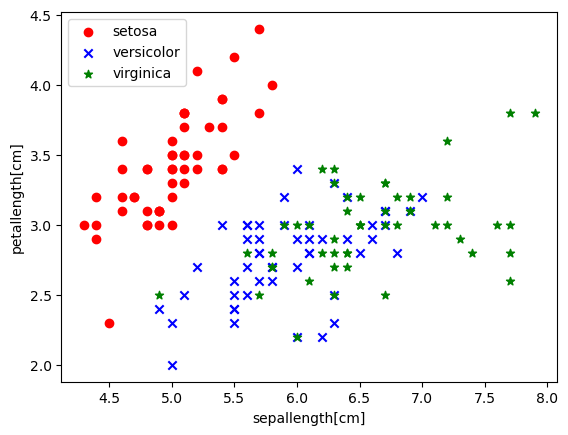

In [14]:
plt.scatter(X.iloc[:50,0], X.iloc[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X.iloc[50:100,0], X.iloc[50:100,1], color='blue', marker='x', label='versicolor')
plt.scatter(X.iloc[100:150,0], X.iloc[100:150,1], color='green', marker='*', label='virginica')
plt.xlabel('sepallength[cm]')
plt.ylabel('petallength[cm]')
plt.legend(loc='upper left')
plt.show()

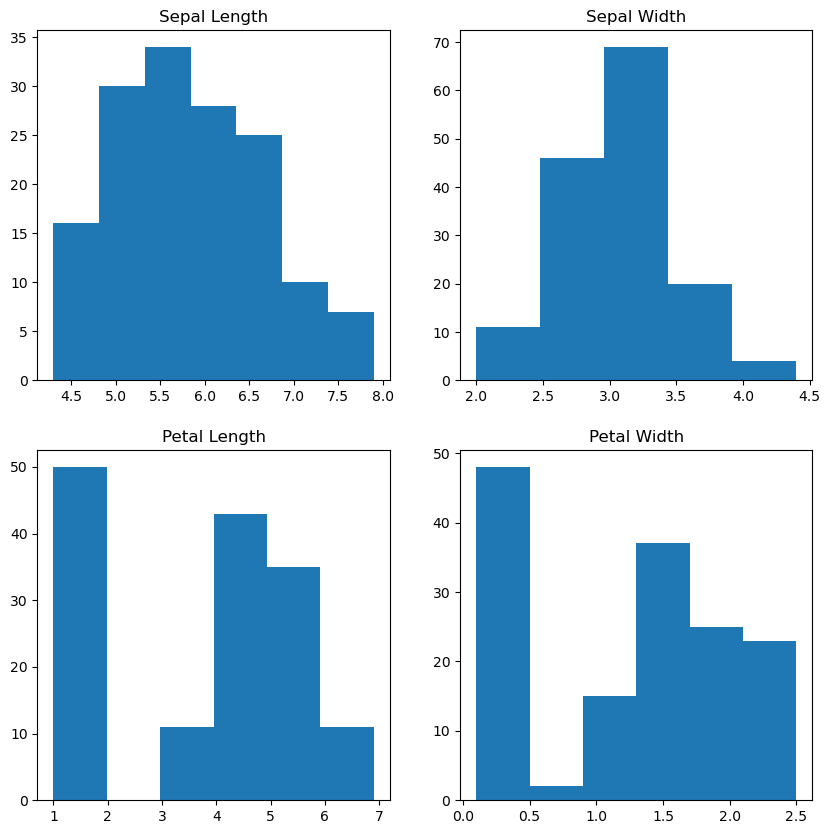

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5);
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6);
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6);


Statistical Summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


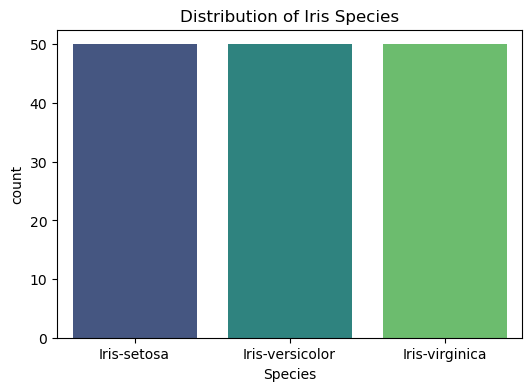

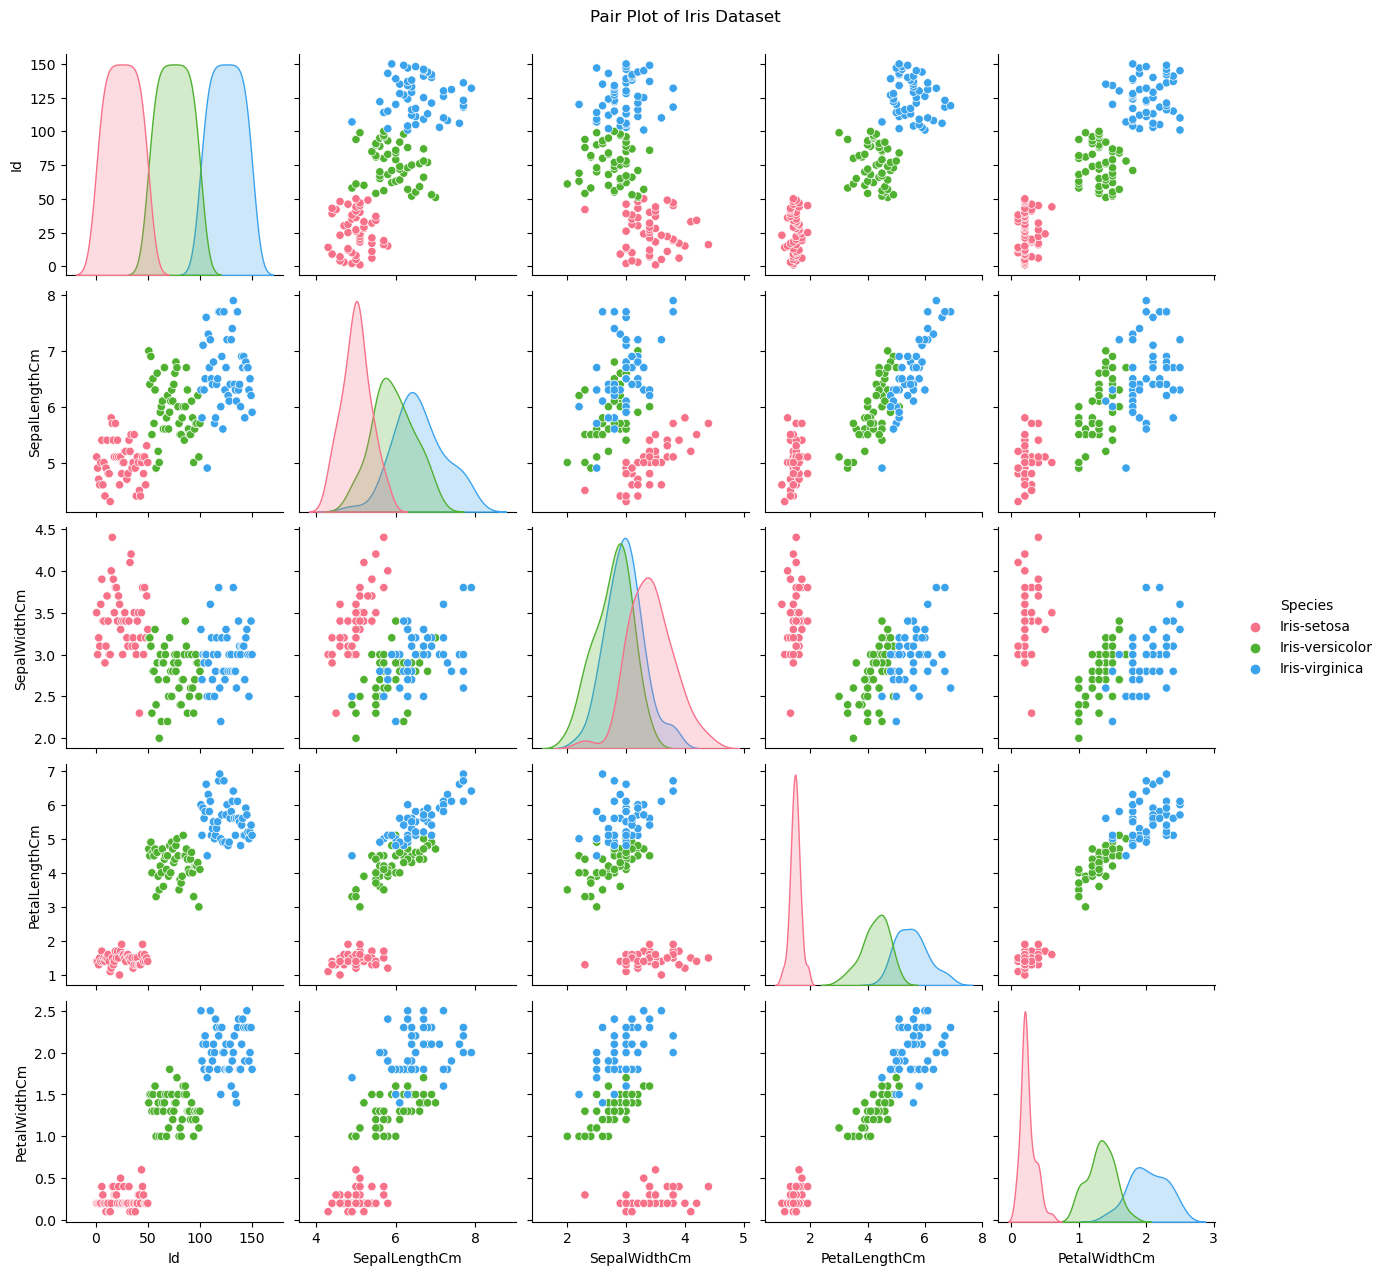

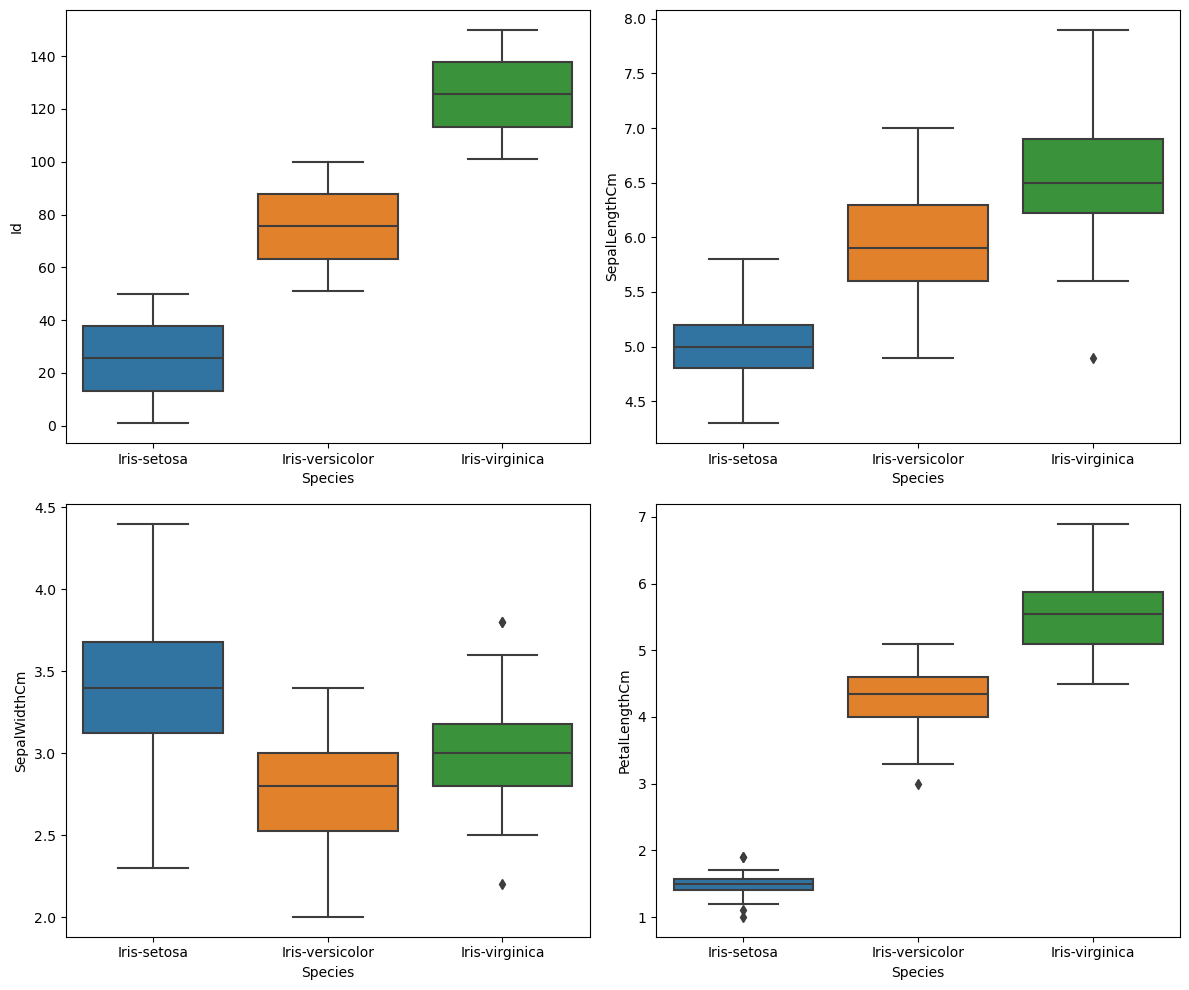

In [16]:
# Data Exploration & Visualization

print("\nStatistical Summary:")
print(df.describe())


# Count of each species
plt.figure(figsize=(6,4))
sns.countplot(x='Species', data=df, palette='viridis')
plt.title('Distribution of Iris Species')
plt.show()


# Pairplot to visualize relationships
sns.pairplot(df, hue='Species', palette='husl')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()


# Box plots for feature distributions
fig, axes = plt.subplots(2, 2, figsize=(12,10))
features = df.columns[:-1]
for ax, feature in zip(axes.flatten(), features):
  sns.boxplot(x='Species', y=feature, data=df, ax=ax)
plt.tight_layout()
plt.show()


Missing Values in Dataset:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Old Shape:  (150, 6)
new Shape:  (146, 6)


<Axes: xlabel='SepalWidthCm'>

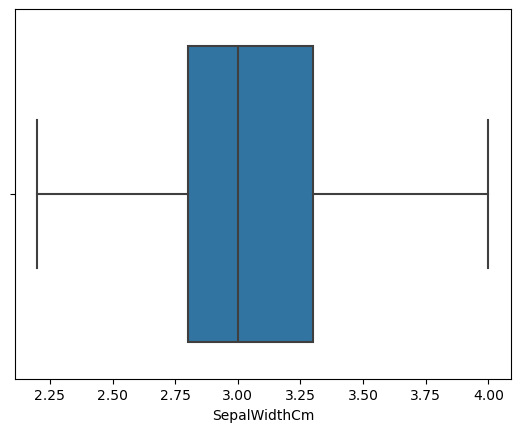

In [17]:
# Check Missing Values & Outliers

print("\nMissing Values in Dataset:")
print(df.isnull().sum())

Q1 = np.percentile(df['SepalWidthCm'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['SepalWidthCm'], 75, interpolation = 'midpoint')
IQR = Q3- Q1
print("Old Shape: ", df.shape)

upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("new Shape: ", df.shape)

sns.boxplot(x='SepalWidthCm', data=df)

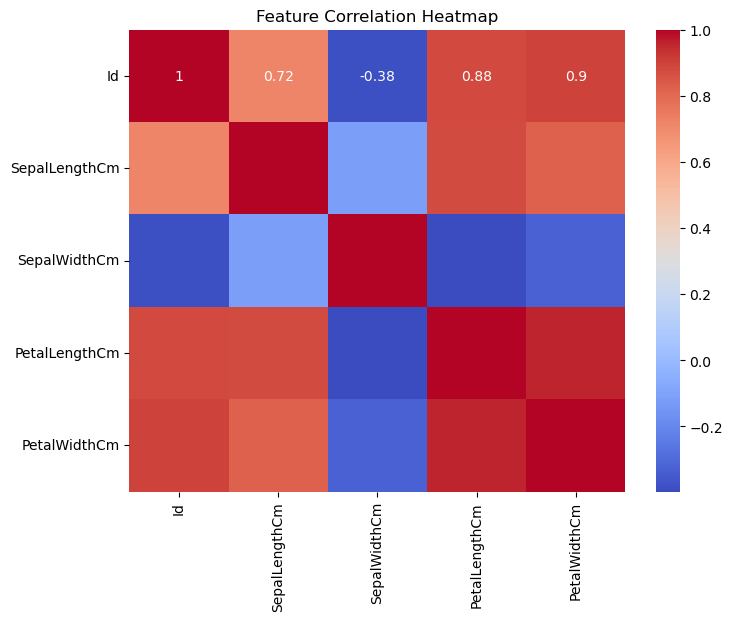

In [18]:
# Feature Correlation

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [19]:
# Model Training — Logistic Regression

model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Model Accuracy: 100.0 %


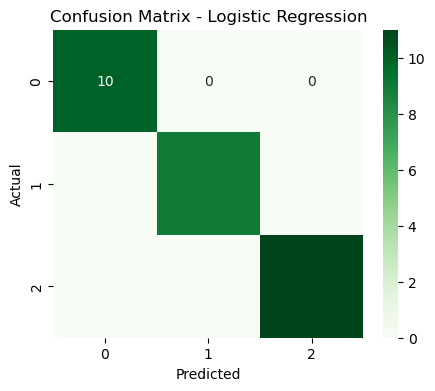

In [20]:
# Model Prediction & Evaluation

y_pred = model.predict(X_test)


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", round(accuracy * 100, 2), "%")


plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
# Model Insights

coeff_df = pd.DataFrame(model.coef_, columns=X.columns)
coeff_df['species_class'] = ['setosa_vs_others', 'versicolor_vs_others', 'virginica_vs_others']
print("\nFeature Coefficients by Class:")
print(coeff_df)

print("\n✅ Iris Classification project completed successfully!")


Feature Coefficients by Class:
   SepalLengthCm  SepalWidthCm  PetalLengthCm         species_class
0      -1.291484      1.145439      -2.459828      setosa_vs_others
1       0.790225     -0.563256      -0.930901  versicolor_vs_others
2       0.501259     -0.582183       3.390728   virginica_vs_others

✅ Iris Classification project completed successfully!
